In [ ]:
import re
import string
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_traveloka = pd.read_csv('/content/Data_Scrapping_Traveloka_Hotel_Bali.csv') #mengupload data

In [ ]:
df_traveloka

,web-scraper-order,USERNAME,RATING,REVIEW,TIME,COUNT THE PEOPLE WHO LIKED THE REVIEW
0,1743116909-1,Trianingsih I. L.,10.0,"will stay here next time, thank you!",2025-03-18,2
1,1743116909-2,G***e,5.9,"Overall, my stay at this hotel was quite disap...",2025-02-23,7
2,1743116909-4,wa,8.5,Staff friendly and comfort recommendations for...,2025-02-09,1
3,1743116909-6,M***a,10.0,"the room was clean and the staff are friendly,...",2025-01-19,2
4,1743116909-7,S***n,6.5,Hotels need remodeling and renovation. Hygiene...,2025-01-01,4
...,...,...,...,...,...,...
2803,1743116909-2972,zi,8.5,"The rooms are nice, suitable for a honeymoon, ...",2017-01-04,0
2804,1743116909-2973,FI,8.5,"Hmm, over all good, only the service that I th...",2017-01-03,0
2805,1743116909-2974,T,8.0,"Rooms are spacious, the other side of the mall...",2017-01-03,0
2806,1743116909-2975,GT,6.1,The experience of staying at this hotel is a b...,2017-01-01,0


In [ ]:
df_traveloka = df_traveloka[['REVIEW', 'RATING', 'COUNT THE PEOPLE WHO LIKED THE REVIEW']].dropna()

In [ ]:
df_traveloka

,REVIEW,RATING,COUNT THE PEOPLE WHO LIKED THE REVIEW
0,"will stay here next time, thank you!",10.0,2
1,"Overall, my stay at this hotel was quite disap...",5.9,7
2,Staff friendly and comfort recommendations for...,8.5,1
3,"the room was clean and the staff are friendly,...",10.0,2
4,Hotels need remodeling and renovation. Hygiene...,6.5,4
...,...,...,...
2803,"The rooms are nice, suitable for a honeymoon, ...",8.5,0
2804,"Hmm, over all good, only the service that I th...",8.5,0
2805,"Rooms are spacious, the other side of the mall...",8.0,0
2806,The experience of staying at this hotel is a b...,6.1,0


Text Processing

In [ ]:
import re
import nltk
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag, word_tokenize

import nltk
nltk.download('punkt_tab')

# Download resource sekali saja
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Fungsi konversi POS tag ke format WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# --- STEP 1: Kontraksi khusus ---
custom_contractions = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "could've": "could have",
    "couldn't": "could not", "didn't": "did not", "doesn't": "does not", "don't": "do not",
    "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would",
    "he'll": "he will", "he's": "he is", "i'd": "i would", "i'll": "i will", "i'm": "i am",
    "i've": "i have", "isn't": "is not", "it's": "it is", "let's": "let us", "might've": "might have",
    "must've": "must have", "mustn't": "must not", "shan't": "shall not", "she'd": "she would",
    "she'll": "she will", "she's": "she is", "should've": "should have", "shouldn't": "should not",
    "that's": "that is", "there's": "there is", "they'd": "they would", "they'll": "they will",
    "they're": "they are", "they've": "they have", "wasn't": "was not", "we'd": "we would",
    "we're": "we are", "we've": "we have", "weren't": "were not", "what's": "what is",
    "where's": "where is", "who's": "who is", "won't": "will not", "would've": "would have",
    "wouldn't": "would not", "you'd": "you would", "you'll": "you will", "you're": "you are",
    "couldn't've": "could not have", "shouldn't've": "should not have", "wouldn't've": "would not have",
    "i'd've": "i would have", "i'll've": "i will have", "you'd've": "you would have", "you'll've": "you will have",
    # Tambahan umum dari review Traveloka
    "room's": "room is", "pool's": "pool is", "restaurant's": "restaurant is",
    "staff's": "staff is", "area's": "area is", "location's": "location is",
    "hotel's": "hotel is", "building's": "building is", "place's": "place is",
    "view's": "view is", "owner's": "owner is", "smell's": "smell is", "thanku": "thank you"
}

def expand_contractions(text):
    text = text.lower()
    for contraction, expanded in custom_contractions.items():
        text = re.sub(r'\b' + re.escape(contraction) + r'\b', expanded, text)
    # Tangani generic 's
    text = re.sub(r"\b(\w+)'s\b", r"\1 is", text)
    return text

# --- STOPWORDS ---
stop_words = set(stopwords.words('english'))
custom_stopwords = {"hmm", "uh", "ah", "oh", "uhh", "uhm"}
stop_words.update(custom_stopwords)

lemmatizer = WordNetLemmatizer()

def refine_tokens(tokens):
    refine_map = {
        'friendly': 'friend',
        'unfortunately': 'unfortunate',
        'definitely': 'definite',
        'hopefully': 'hope',
        'actually': 'actual',
        'smelly': 'smell',
        'highly': 'high',
        'quickly': 'quick',
        'poorly': 'poor',
        'fairly': 'fair',
        'tasty': 'taste',
        'musty': 'must',
        'electricity': 'electric',
        'satisfactory': 'satisfy',
        'frequency': 'frequent',
        'hubby': 'husband',
        'apology': 'apologize',
    }
    return [refine_map.get(w, w) for w in tokens]

# --- FINAL PIPELINE ---
def clean_text(text):
    text = expand_contractions(text)                                  # Expand contractions
    text = re.sub(r"[^a-z\s]", " ", text.lower())                     # Remove punctuation & digits
    tokens = word_tokenize(text)                                      # Tokenization
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]# Stopword removal + short words
    tokens = pos_tag(tokens)
    tokens = [lemmatizer.lemmatize(w, get_wordnet_pos(pos)) for w, pos in tokens]
    tokens = refine_tokens(tokens)
    return " ".join(tokens)

# --- Terapkan ke DataFrame ---
df_traveloka['review_cleaned'] = df_traveloka['REVIEW'].astype(str).apply(clean_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [ ]:
df_traveloka['review_cleaned']

,review_cleaned
0,stay next time thank
1,overall stay hotel quite disappointing big iss...
2,staff friend comfort recommendation guy thank
3,room clean staff friend glad come stay night
4,hotel need remodel renovation hygiene concern ...
...,...
2803,room nice suitable honeymoon food quite vary l...
2804,good service think less satisfy usually anothe...
2805,room spacious side mall culinary cheap hotel blkg
2806,experience stay hotel bit disappointing room c...


TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.9,
    min_df=5,
    ngram_range=(1, 2),
    max_features=5000
)

# Transform teks menjadi vektor numerik (fit + transform)
X_tfidf = tfidf_vectorizer.fit_transform(df_traveloka['review_cleaned'])

# Optional: konversi ke DataFrame jika ingin lihat fitur
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.shape)
tfidf_df.head(30)


(2808, 2038)


,able,access,access card,accommodation,accord,accord expectation,accord photo,accord picture,accordance,actual,...,wow,write,wrong,yeah,year,yellow,yes,yesterday,yet,young
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Variabel X dan Y untuk pemodelan boosting

X : TF-IDF review dan Jumlah Like

Y : Rating (Sentimen)

In [ ]:
def label_sentiment(rating):
    if rating >= 8:
        return "positive"
    elif rating >= 6:
        return "neutral"
    else:
        return "negative"

df_traveloka['sentiment'] = df_traveloka['RATING'].apply(label_sentiment)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode label menjadi angka
le = LabelEncoder()

In [ ]:
from scipy.sparse import hstack

X_text = X_tfidf
X_numeric = df_traveloka[['COUNT THE PEOPLE WHO LIKED THE REVIEW']].fillna(0)

# Gabungkan fitur teks + numerik
X = hstack([X_text, X_numeric])
y = le.fit_transform(df_traveloka['sentiment'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Pemodelan**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

# Definisikan model
models = {
    'LightGBM': LGBMClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Fungsi scoring
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
}

# Cross-validation dan evaluasi
results = {}

for name, model in models.items():
    cv_result = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    results[name] = {
        'Accuracy': cv_result['test_accuracy'].mean(),
        'Precision': cv_result['test_precision_macro'].mean(),
        'Recall': cv_result['test_recall_macro'].mean()
    }

# Tampilkan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\nHasil Evaluasi Model (Rata-rata 5-Fold CV):")
print(df_results.round(4))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8040
[LightGBM] [Info] Number of data points in the train set: 1796, number of used features: 363
[LightGBM] [Info] Start training from score -2.558843
[LightGBM] [Info] Start training from score -1.975864
[LightGBM] [Info] Start training from score -0.243392


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7900
[LightGBM] [Info] Number of data points in the train set: 1797, number of used features: 353
[LightGBM] [Info] Start training from score -2.559400
[LightGBM] [Info] Start training from score -1.972413
[LightGBM] [Info] Start training from score -0.243948


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7727
[LightGBM] [Info] Number of data points in the train set: 1797, number of used features: 349
[LightGBM] [Info] Start training from score -2.559400
[LightGBM] [Info] Start training from score -1.972413
[LightGBM] [Info] Start training from score -0.243948


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7933
[LightGBM] [Info] Number of data points in the train set: 1797, number of used features: 359
[LightGBM] [Info] Start training from score -2.559400
[LightGBM] [Info] Start training from score -1.972413
[LightGBM] [Info] Start training from score -0.243948


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7864
[LightGBM] [Info] Number of data points in the train set: 1797, number of used features: 354
[LightGBM] [Info] Start training from score -2.552231
[LightGBM] [Info] Start training from score -1.976421
[LightGBM] [Info] Start training from score -0.243948


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pr


Hasil Evaluasi Model (Rata-rata 5-Fold CV):
                  Accuracy  Precision  Recall
LightGBM            0.8072     0.5569  0.4884
GradientBoosting    0.7970     0.5340  0.4105
AdaBoost            0.7818     0.4391  0.3561


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#latih ulang model dengan data training
best_model = LGBMClassifier(random_state=42)
best_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10263
[LightGBM] [Info] Number of data points in the train set: 2246, number of used features: 430
[LightGBM] [Info] Start training from score -2.557851
[LightGBM] [Info] Start training from score -1.973903
[LightGBM] [Info] Start training from score -0.243837


LGBMClassifier(random_state=42)

In [ ]:
#evaluasi pada data testing
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)

print("\n=== Evaluasi di Data Testing ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))


=== Evaluasi di Data Testing ===
[[ 12  18  14]
 [ 15  19  44]
 [  6  16 418]]
              precision    recall  f1-score   support

           0     0.3636    0.2727    0.3117        44
           1     0.3585    0.2436    0.2901        78
           2     0.8782    0.9500    0.9127       440

    accuracy                         0.7989       562
   macro avg     0.5334    0.4888    0.5048       562
weighted avg     0.7657    0.7989    0.7792       562



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Hyperparameter Tuning + Class Weight**

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Inisialisasi model
model = LGBMClassifier(random_state=42, class_weight='balanced')

# Grid hyperparameter
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1]
}

# Grid Search dengan 5-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid,
                    cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

# Model terbaik
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10263
[LightGBM] [Info] Number of data points in the train set: 2246, number of used features: 430
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [ ]:
# Prediksi di data test
y_pred = best_model.predict(X_test)

# Evaluasi hasil
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 17  19   8]
 [ 16  25  37]
 [ 15  31 394]]

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.39      0.37        44
           1       0.33      0.32      0.33        78
           2       0.90      0.90      0.90       440

    accuracy                           0.78       562
   macro avg       0.53      0.53      0.53       562
weighted avg       0.78      0.78      0.78       562



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


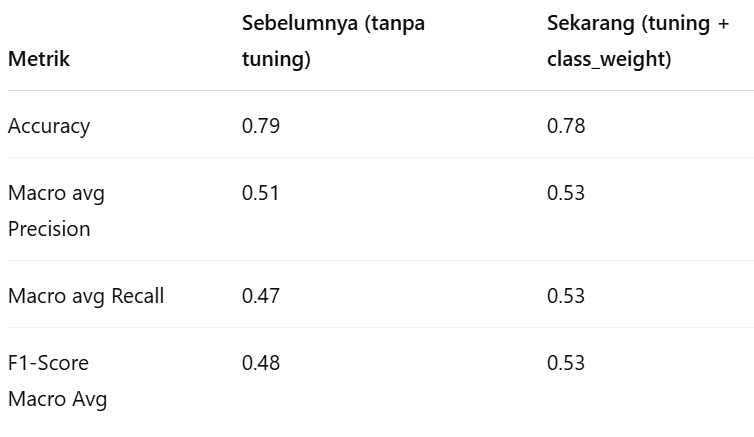

**Cek Kesesuaian Rating dengan Sentimen hasil pemodelan**

In [ ]:
# Salin dataframe asli
df = df_traveloka.copy()

# Ubah sentimen ke angka: Negative=0, Neutral=1, Positive=2
sentiment_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment_score'] = df['sentiment'].map(sentiment_map)

In [ ]:
#hitung korelasi rating vs sentimen

correlation = df[['RATING', 'sentiment_score']].corr()
print("Korelasi antara rating dan sentimen score:")
print(correlation)

Korelasi antara rating dan sentimen score:
                   RATING  sentiment_score
RATING           1.000000         0.900951
sentiment_score  0.900951         1.000000


<ipython-input-20-5a6da2c3a4a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='RATING', data=df, order=['negative', 'neutral', 'positive'], palette='Set2')


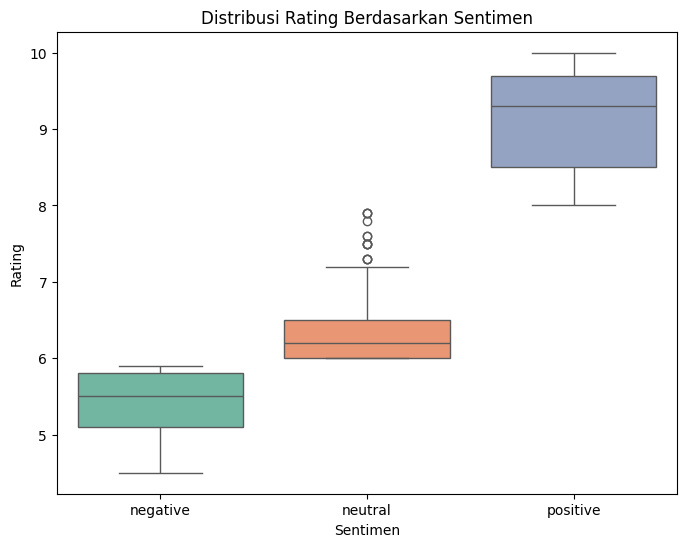

In [ ]:
#visualisasi perbandingan
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='RATING', data=df, order=['negative', 'neutral', 'positive'], palette='Set2')
plt.title('Distribusi Rating Berdasarkan Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Rating')
plt.show()

In [ ]:
#visualisasi hasil pemodelan
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Daftar sentimen dan warna
sentiments = ['positive', 'neutral', 'negative']
colors = ['Greens', 'gray', 'Reds']

# Setup figure: resolusi tinggi dan ukuran besar
fig, axs = plt.subplots(1, 3, figsize=(30, 10), dpi=300)  # lebih besar dan tajam
fig.subplots_adjust(wspace=0.3, top=0.85)  # Spasi antar subplot dan judul atas

# Judul utama
fig.suptitle('Word Cloud Berdasarkan Sentimen Review Mega Boutique Hotel & Spa', fontsize=26, fontweight='bold')

# Loop untuk tiap sentimen
for i, (sentiment, color) in enumerate(zip(sentiments, colors)):
    text = ' '.join(df_traveloka[df_traveloka['sentiment'] == sentiment]['review_cleaned'])

    wordcloud = WordCloud(
        width=1200,  # ukuran wordcloud lebih besar
        height=800,
        background_color='white',
        colormap=color,
        max_words=100,  # batasi kata biar lebih fokus
        contour_color='black',  # kasih border halus
        contour_width=0.5
    ).generate(text)

    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(f'Sentimen {sentiment.capitalize()}', fontsize=20, fontweight='semibold', pad=12)
    axs[i].axis('off')

plt.tight_layout(pad=3.0)
plt.show()


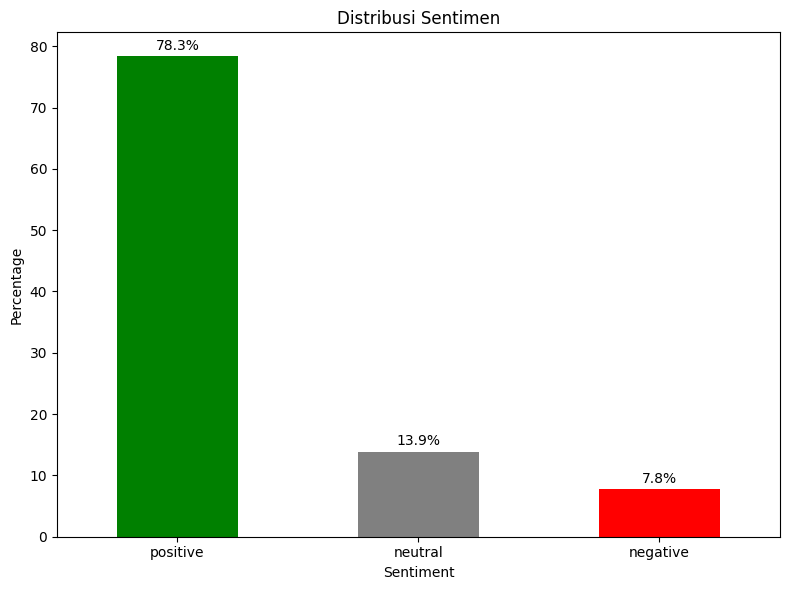

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = df_traveloka['sentiment'].value_counts()
total_sentiments = sentiment_counts.sum()  # Jumlah total semua sentimen
sentiment_percentages = (sentiment_counts / total_sentiments) * 100

plt.figure(figsize=(8, 6))
ax = sentiment_percentages.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribusi Sentimen')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Menambahkan label persentase
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height + 1), ha='center')

plt.tight_layout()  # Untuk memastikan label tidak terpotong
plt.show()

**Overall Review**

In [ ]:
overall_rating = df_traveloka['RATING'].mean()
print(f"Overall Review: {overall_rating:.2f}/10")

Overall Review: 8.51/10


**Analisis Sentimen Berdasarkan Aspek**

In [ ]:
# Definisikan kata kunci aspek
# Kata kunci aspek yang diperluas dengan hasil LDA
aspect_keywords = {
    'Cleanliness': [
        'bersih', 'kebersihan', 'toilet bersih', 'kotor', 'bau', 'clean', 'dirty',
        'neat', 'tidy', 'spotless', 'filthy', 'hygiene', 'smelly', 'sanitary',
        'smell', 'odour', 'bau tidak sedap'  # dari topik 1 dan 6
    ],
    'Comfort': [
        'nyaman', 'tidak nyaman', 'bising', 'tenang', 'sunyi', 'cozy', 'relaxing',
        'peaceful', 'noisy', 'quiet', 'comfortable', 'tidur nyenyak', 'sleep well',
        'spacious', 'satisfy', 'nice', 'friend', 'honeymoon', 'pretty', 'tidur nyaman',
        'interior', 'desain interior', 'dekorasi', 'interior room', 'atmosphere', 'vibe', 'ambience',
        'affordable', 'price', 'value', 'worth it', 'cheap', 'expensive', 'budget',  'reasonable',
        'terjangkau', 'harga', 'nilai', 'sepadan', 'murah', 'mahal', 'anggaran', 'wajar'

    ],
    'Meal': [
        'makanan', 'sarapan', 'menu', 'enak', 'tidak enak', 'restoran', 'breakfast',
        'delicious', 'tasty', 'not tasty', 'menu lengkap', 'food', 'buffet',
        'restaurant', 'meal', 'dining', 'breakfast options', 'variasi makanan',
        'really good', 'good food'
    ],
    'Location': [
        'lokasi', 'strategis', 'strategic', 'akses', 'dekat', 'jauh', 'mall', 'pusat kota',
        'sebelah', 'transportasi', 'location', 'nearby', 'central', 'access',
        'surrounding', 'distance', 'walkable', 'jalan kaki',
        'mega', 'bali', 'around', 'near mega', 'around bali'
    ],
    'Service': [
        'layanan', 'ramah', 'tidak ramah', 'pelayan', 'pegawai', 'receptionist',
        'service', 'friendly', 'unfriendly', 'staff', 'helpful', 'inattentive',
        'slow service', 'waiter', 'karyawan', 'responsif', 'quick response',
        'always', 'security'
    ],
    'Facilities': [
        'fasilitas', 'lengkap', 'terbatas', 'wifi', 'kolam', 'parkir', 'gym',
        'amenities', 'pool', 'parking', 'facility', 'no gym', 'no pool', 'spa',
        'ac', 'air conditioner', 'tv', 'kamar mandi', 'shower', 'toilet', 'televisison',
        'towel', 'bathroom', 'water', 'hot', 'cold', 'fridge', 'complete'
    ]
}


# Inisialisasi list penyimpanan
aspect_sentiment_summary = []

# Loop setiap aspek
for aspect, keywords in aspect_keywords.items():
    # Filter ulasan yang mengandung kata kunci aspek
    mask = df_traveloka['review_cleaned'].apply(lambda x: any(kw in x for kw in keywords))
    aspect_df = df_traveloka[mask]

    if not aspect_df.empty:
         # Hitung persentase sentimen
        sentiment_counts = aspect_df['sentiment'].value_counts(normalize=True) * 100
        pos = sentiment_counts.get('positive', 0)
        neu = sentiment_counts.get('neutral', 0)
        neg = sentiment_counts.get('negative', 0)

        # Hitung skor aspek dalam rentang 1–5
        score = ((pos * 2 + neu * 1) / 2) / 100 * 5
        score = round(score, 1)

        # Simpan ke dalam list
        aspect_sentiment_summary.append({
            'Aspect': aspect,
            'Positive (%)': round(pos, 1),
            'Neutral (%)': round(neu, 1),
            'Negative (%)': round(neg, 1),
            'Rating': score
        })

# Ubah ke DataFrame dan urutkan berdasarkan skor
aspect_sentiment_df = pd.DataFrame(aspect_sentiment_summary)
aspect_sentiment_df.sort_values(by='Rating', ascending=False, inplace=True)
aspect_sentiment_df.reset_index(drop=True, inplace=True)

# Tampilkan hasil
aspect_sentiment_df


,Aspect,Positive (%),Neutral (%),Negative (%),Rating
0,Comfort,84.4,10.3,5.3,4.5
1,Location,84.1,9.2,6.7,4.4
2,Service,78.5,13.7,7.8,4.3
3,Meal,80.7,12.0,7.3,4.3
4,Facilities,77.2,14.0,8.8,4.2
5,Cleanliness,71.3,17.7,10.9,4.0


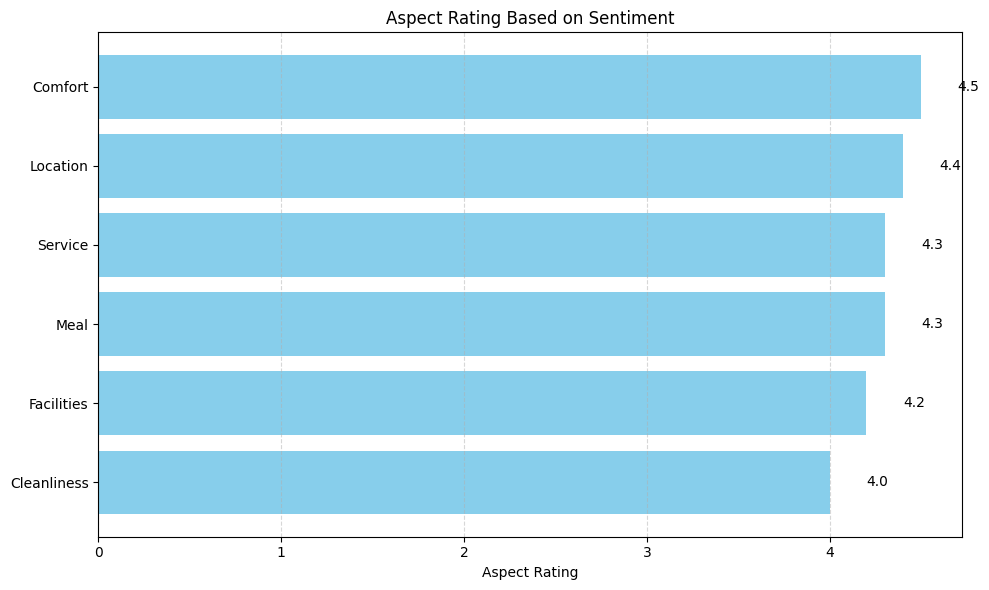


Visualisasi dengan Karakter:
Comfort     : ⭐⭐⭐⭐ (4.5)
Location    : ⭐⭐⭐⭐ (4.4)
Service     : ⭐⭐⭐⭐ (4.3)
Meal        : ⭐⭐⭐⭐ (4.3)
Facilities  : ⭐⭐⭐⭐ (4.2)
Cleanliness : ⭐⭐⭐⭐ (4.0)


In [ ]:
import matplotlib.pyplot as plt

# Tampilkan bar chart dengan nilai di ujung bar
plt.figure(figsize=(10,6))
bars = plt.barh(aspect_sentiment_df['Aspect'], aspect_sentiment_df['Rating'], color='skyblue')
plt.xlabel('Aspect Rating')
plt.title('Aspect Rating Based on Sentiment')

# Tambahkan angka skor di ujung bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}', va='center', fontsize=10)

plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Buat visualisasi versi karakter (teks)
print("\nVisualisasi dengan Karakter:")
for _, row in aspect_sentiment_df.iterrows():
    stars = "⭐" * int(round(row['Rating']))
    print(f"{row['Aspect']:12}: {stars} ({row['Rating']})")


**Mengulik Review Positif dan Negatif**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


#ambil data review dengan bintang tinggi
df_high_rating = df_traveloka[df_traveloka['RATING'] >= 8]['review_cleaned'].copy()

# Ubah ke matrix kata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
count_vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    ngram_range=(1, 2), #bisa satu atau dua kata
    max_features=5000)
X_counts = count_vectorizer.fit_transform(df_high_rating)

# LDA Model
ldapositif = LatentDirichletAllocation(
    n_components=5, #jumlah topik yang ingin diekstrak
    max_iter=10,
    learning_method='online',
    random_state=42)
ldapositif.fit(X_counts)

# Tampilkan topik dan kata kuncinya
print ("-----Topic Modelling Review Sentimen Positif-----\n")
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topik #{idx + 1}:")
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(" | ".join(top_features))
        print()

#tampilkan topik-topik
feature_names = count_vectorizer.get_feature_names_out()
display_topics(ldapositif, feature_names, no_top_words=10)


-----Topic Modelling Review Sentimen Positif-----

Topik #1:
room | okay | water | hotel | bit | good | overall | hot | time | check

Topik #2:
room | hotel | good | nice | breakfast | clean | comfortable | service | food | friend

Topik #3:
place | view | bath | mall | tourist | bath tub | tub | galeria | strategic place | budget

Topik #4:
mega | stay | boutique | mega boutique | hotel | boutique hotel | bali | stay mega | spa | thank

Topik #5:
far | dim | mosquito | lot mosquito | rat | location far | neat | nginep | far airport | hotel convenient



In [ ]:
#ambil data review dengan bintang rendah dan kolom review_cleaned
df_low_rating_ldanegative = df_traveloka[df_traveloka['RATING'] < 6]['review_cleaned'].copy()

# Ubah ke matrix kata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
count_vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=5,
    ngram_range=(1, 2), #bisa satu atau dua kata
    max_features=5000)
X_counts = count_vectorizer.fit_transform(df_low_rating_ldanegative)


# LDA Model
ldanegative = LatentDirichletAllocation(
    n_components=5, #jumlah topik yang ingin diekstrak
    max_iter=10,
    learning_method='online',
    random_state=42)
ldanegative.fit(X_counts)

# Tampilkan topik dan kata kuncinya
print ("-----Topic Modelling Review Sentimen Negatif-----\n")
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topik #{idx + 1}:")
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(" | ".join(top_features))
        print()

#tampilkan topik-topik
feature_names = count_vectorizer.get_feature_names_out()
display_topics(ldanegative, feature_names, no_top_words=10)


-----Topic Modelling Review Sentimen Negatif-----

Topik #1:
room | hotel | dirty | smell | service | good | bathroom | bad | towel | bed

Topik #2:
room | hotel | less | breakfast | food | ask | also | floor | stay | good

Topik #3:
hotel | room | check | stay | time | first | night | even | say | day

Topik #4:
disappointed | break | insect | room | go | service | vacation | need | say | lot

Topik #5:
room | hotel | cockroach | nice | cockroach room | staff | family | suite | close | stay

